# 贝叶斯统计

庞龙刚@CCNU 

## 学习目标

- 学会贝叶斯统计思想
- 为贝叶斯分析确定理论模型参数及模型不确定性奠基


## 学习内容

- 贝叶斯统计
- 贝叶斯统计在日常生活中的应用
- 贝叶斯分析在高能物理中的应用

In [96]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import Image

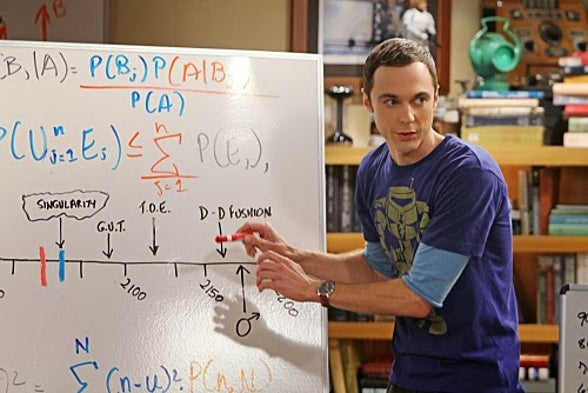

In [118]:
# 电视剧《生活大爆炸》中天才谢尔顿在白板最上方写着贝叶斯公式
Image("images/big_bang_theory_bayes_formula.jpg")

《Big bang theory》中天才理论物理学家谢尔顿为何在白板上写下贝叶斯公式？

1. 前沿物理学研究需要贝叶斯统计确定模型参数及不确定性
2. 贝叶斯分析被广泛应用于金融投资、生物医学、机器学习等领域，比如
   - 垃圾邮件过滤，推荐系统
   - 朴素贝叶斯，贝叶斯神经网络

贝叶斯定理是英国数学家托马斯·贝叶斯（Thomas Bayes）提出的定理。

这个定理的提出是为了解决概率中的**反问题**。

概率中的**正问题**比反问题好计算，比如，

如果知道一个箱子中有 100 个白色球，50个红色球，计算从中拿一个球是红色的概率是正问题，结果等于 50/(50+100）= 1/3。

但是，如果事先不知道箱子中有多少个白球，多少个红球，根据多次拿出的球的颜色推断箱子中红球的概率是**反问题**。

前沿物理研究遇到大量的**反问题**，需要贝叶斯定理的帮助。

谈到贝叶斯不得不谈起统计学派之争：**频率学派**与**贝叶斯学派**。

频率学派认为实验无穷多次时，某件事发生的频率收敛到概率，即概率由大数定理来定义。

贝叶斯学派认为概率是人对某事发生可能性的信仰 （belief），是一个很主观的概念。

- 没有更多证据之前，这种信仰称为“先验概率”(A prior)
- 有了更多证据，信仰发生修正，称为“后验概率”（Posterior) 

“信仰”，“先验”，“后验”这些词使贝叶斯统计看起来比频率学派抽象，真正应用于日常生活又很简单实用。

举一些简单的例子，日常生活中大家经常谈到的概率其实是贝叶斯概率，比如

1. 明天下雨的概率是 20%
2. 这个西瓜成熟的概率是 80%
3. 他/她喜欢我的概率是 90%
4. 期末考试我能得优秀的概率是 80%
5. 地震学家预言加州未来5年发生超级大地震(The big one)的概率是 90%

学会了贝叶斯统计，在日常生活或工作面试时可能会有意想不到的用途，

下面这个例子取自《统计学关我什么事：生活中的极简统计学》。

## **例子:贝叶斯统计判断买东西的人与随便逛逛的人**

商店的店员要判断进店的顾客是真正“要买东西的人”，还是“随便逛逛的人”。

有点经验的店员会有一个大致的估计，比如，按照以往的经验，“要买东西的人“只占 20%，而”随便逛逛的人“占到 80%。

这种初步的估计被称作**”先验“**。 

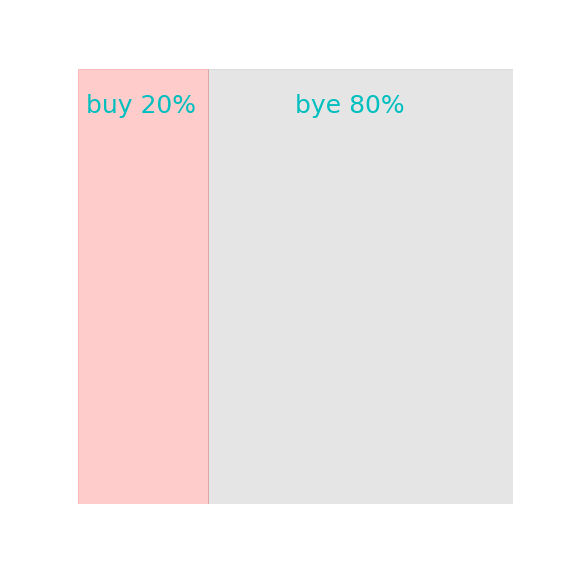

In [163]:
Image("images/custom_prior.png")

如果没有其他信息，店员只能根据**先验**说顾客有 80% 的概率随便逛逛。

有经验的店员会寻找新的信息，进一步提高估计的准确度。

这一步对应着**设定条件概率**：

比如，店员会观察顾客的性别，按照以往的经验，买东西的人中男性的概率是 10%， 女性的概率为 90%。

P(男性 | buy） = 10%， P(女性 | buy） = 90%

女性更享受逛街的乐趣，假设在随便逛逛的人中，男性的概率是 5 %， 女性的概率是 95 %，

P(男性 | bye） = 5 %， P(女性 | bye） = 95 %

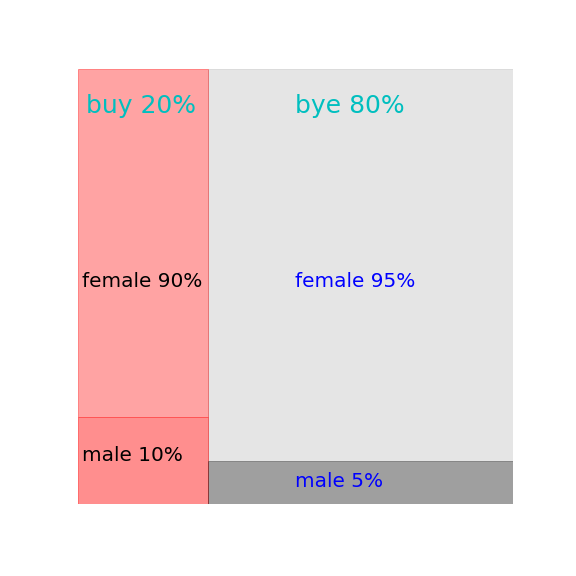

In [155]:
Image("images/conditional_probability.png", height=400)
# 如果观察到进来的顾客为男性 (male)，则概率会在 P(male, buy) 和 P(male, bye) 之间重新分配，

# P(male, buy)  = P(buy) * P(male | buy) = 20% * 10% = 2%
# P(male, bye) = P(bye) * P(male | bye) = 80% * 5% = 4%

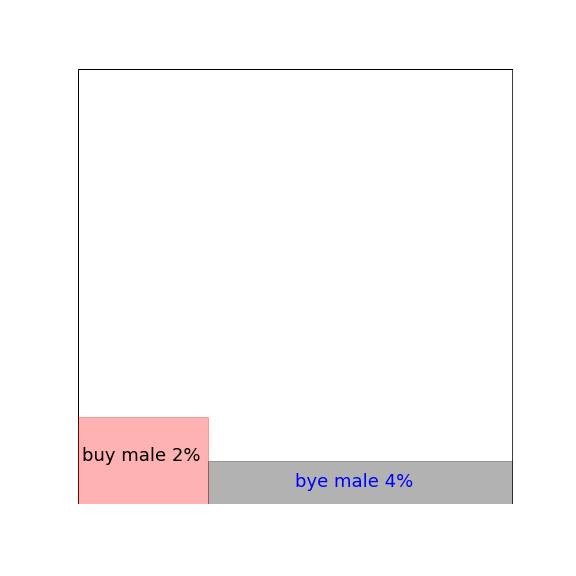

In [165]:
# 因为观察到顾客为男性，可以排除顾客为女性的情况
# 得到两个概率 p(buy and male) 与 p(bye and male)
Image("images/male_buy_or_bye.png")

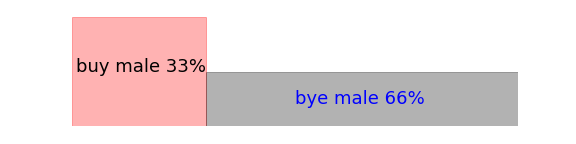

In [171]:
# 最终需要计算 P(buy | male) = P(buy, male) / (P(buy, male) + P(bye, male))
#                           = 2% / (2% + 4%) 
#                           = 33.3%
# 经过归一化，发现如果是男性顾客，buy 的概率为 33.3%; 大家可以自己算一下 P(buy | female)

Image("images/male_buy_or_bye_normalize.png")

### 归纳贝叶斯统计步骤

1. 按照要分类的内容将目标分成两类(buy or bye)，并提供先验概率 p(buy), p(bye)

2. 设定条件概率 p(性别 | buy or bye)，对先验概率进行划分

3. 观察获得新的证据 （性别：male or female），缩小范围

4. 计算在新的证据下，更加精确的归一化概率（后验概率） 

\begin{align}
{\rm 
p(buy | male)} = {\rm p(male, buy) \over p(male)} = {\rm p(buy) p(male | buy) \over p(buy) p(male | buy) + p(bye) p(male | bye)}
\end{align}

## 贝叶斯公式

贝叶斯统计的过程可以用贝叶斯公式描述，

\begin{align}
P(Y | X)  = {P(X | Y) P(Y) \over P(X)}
\end{align}

其中$P(Y | X) $称为后验(Posterior), $P(Y)$ 称为先验（A Prior）， $P(X | Y)$ 称作似然(likelihood), $P(X)$ 称作证据（Evidence）。

Byes 公式可以从两个随机变量 $X, Y$ 的联合概率密度分布 P(X, Y) 简单得到，

\begin{align}
P(X, Y) = P(Y | X) P(X) = P(X | Y) P(Y)
\end{align}

## 贝叶斯分析在核物理中的应用

1. 确定核物质状态方程
2. 确定夸克胶子等离子体的剪切粘滞
3. 确定重味 Quark 的耗散系数
4. 确定喷注能量损失分布
5. 贝叶斯神经网络 (广泛应用于低能核物理）

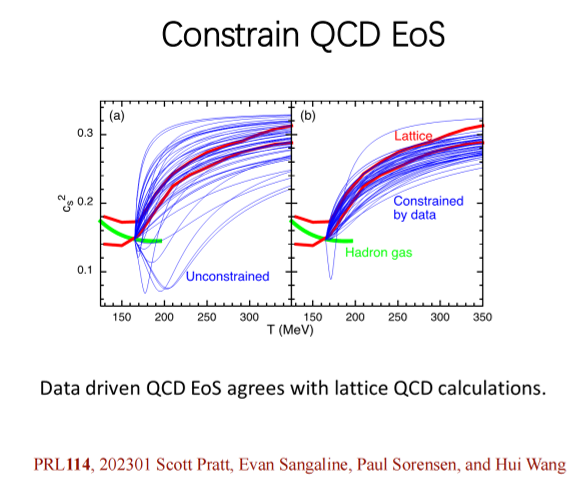

In [173]:
Image("images/Bayes_for_QCD_EoS.png")
# 左边对应参数化的核物质状态方程：改变参数，EOS 覆盖很大范围
# 右边是与实验对比后，画出的参数的后验分布（注意这里不是最大似然估计 MLE，
# 也不是最大后验估计 MAP，最终得到的是参数的后验分布，根据分布可以得到理论模型的置信度）

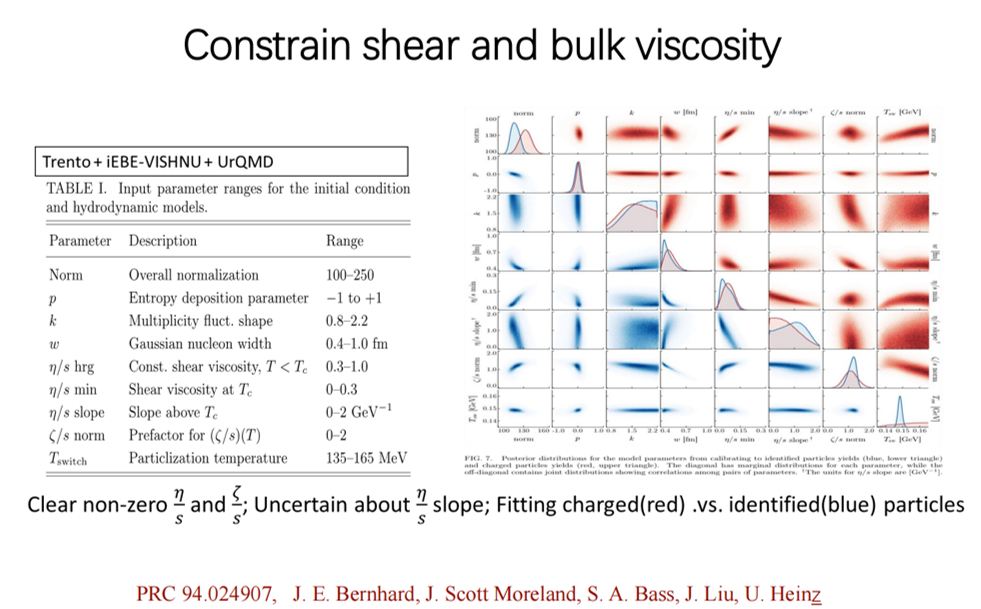

In [167]:
Image("images/Bayes_for_eta_over_s.png")

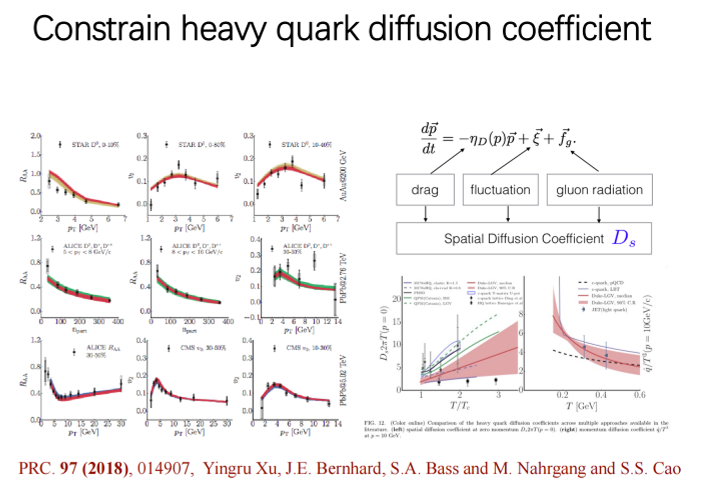

In [168]:
Image("images/Bayes_for_heavy_quark.png")

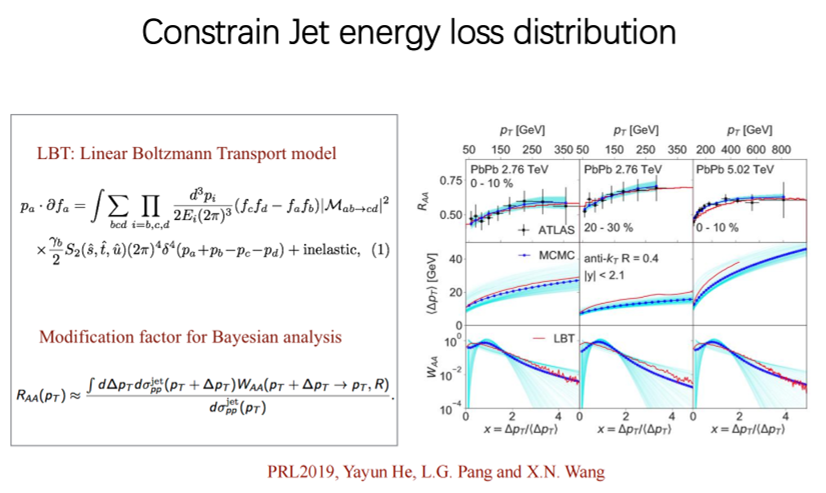

In [169]:
Image("images/Bayes_for_jet_eloss.png")

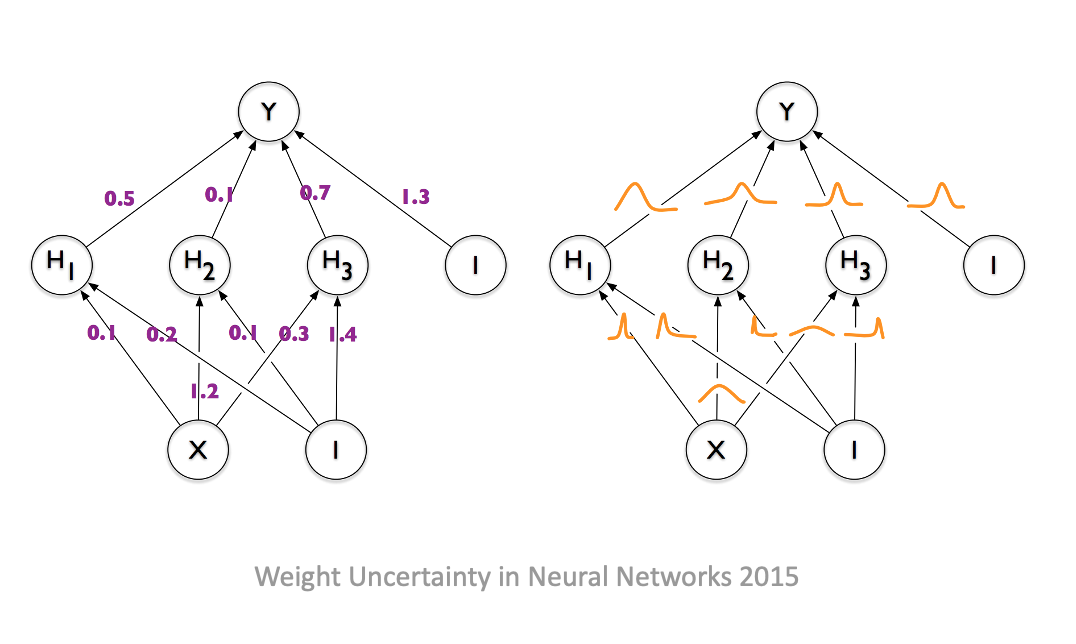

In [170]:
Image("images/贝叶斯神经网络.png")

## 绘制先验概率

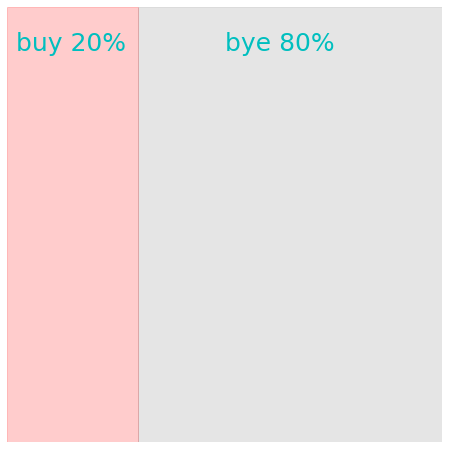

In [162]:
# 用方块的面积表示 “要买东西的人” 与 “随便逛逛的人”
def plot_aprior(left=30):
    plt.figure(figsize=(8, 8))
    who_buy = Rectangle((0, 0), left, 100, fill=True, color='red', alpha=0.2)

    who_bye = Rectangle((left, 0), 100-left, 100, fill=True, color='grey', alpha=0.2)

    plt.gca().add_patch(who_buy)
    plt.gca().add_patch(who_bye)
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.gca().set_aspect('equal')
    plt.gca().axis('off')

    plt.text(2, 90, "buy 20%", color='c', size=25)
    
    plt.text(50, 90, "bye 80%", color='c', size=25)

plot_aprior()
plt.savefig("images/custom_prior.png")

### 绘制条件概率

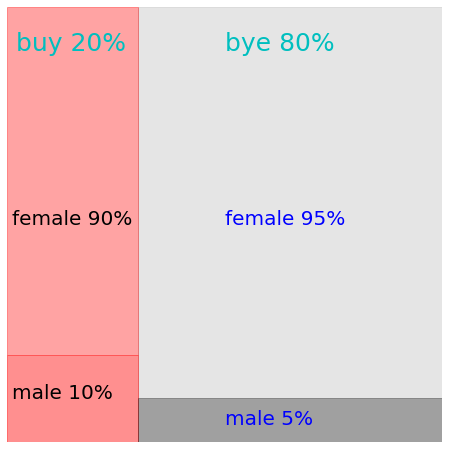

In [131]:
plot_aprior()

left = 30

male_buy = Rectangle((0, 0), left, 20, fill=True, color='red', alpha=0.3)

female_buy = Rectangle((0, 20), left, 80, fill=True, color='red', alpha=0.2)

male_bye = Rectangle((left, 0), 90, 10, fill=True, color='k', alpha=0.3)

plt.gca().add_patch(male_buy)
plt.gca().add_patch(female_buy)
plt.text(1, 10, "male 10%", size=20)
plt.text(1, 50, "female 90%", size=20)

plt.text(50, 4, "male 5%", size=20, color='b')
plt.text(50, 50, "female 95%", size=20, color='b')
plt.gca().add_patch(male_bye)
plt.gca().axis('off')

plt.savefig("images/conditional_probability.png")

### 寻找证据，更新概率

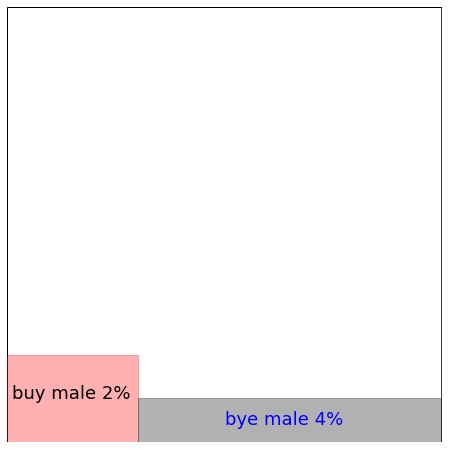

In [160]:
# 用方块的面积表示 “要买东西的人” 与 “随便逛逛的人”
def byes_adjust(p1=2, p2=4, left=30, no_box=False):
    '''p1: p1 percent for class 1
    p2: p2 percent for class 2'''
    if not no_box:
        plt.figure(figsize=(8, 8))
        who_buy = Rectangle((0, 0), 100, 100, fill=False)
        plt.gca().add_patch(who_buy)
        plt.vlines(100, 0, 100)
        plt.gca().set_aspect('equal')
        plt.ylim(0, 100)
    else:
        plt.figure(figsize=(8, 2))
        plt.ylim(0, 20)
            
    male_buy = Rectangle((0, 0), left, 20, fill=True, color='red', alpha=0.3)
    male_bye = Rectangle((left, 0), 100-left, 10, fill=True, color='k', alpha=0.3)



    plt.gca().add_patch(male_buy)
    plt.gca().add_patch(male_bye)
    
    plt.xlim(0, 100)


    plt.gca().axis('off')

    plt.text(1, 10, "buy male {p1}%".format(p1=p1), size=18)

    plt.text(50, 4, "bye male {p2}%".format(p2=p2), size=18, color='b')
    
byes_adjust()

plt.savefig("images/male_buy_or_bye.png")

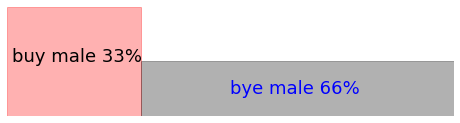

In [161]:
byes_adjust(p1=33, p2=66, no_box=True)


plt.savefig("images/male_buy_or_bye_normalize.png")